# **Use various clustering techniques in colab**

Implement various clustering algorithms in colabs

submit one colab per assignment - provide complete colab with proper documentation etc.,. 

1.   KMeans Clustering
2.   Hierarchal Clustering
3.   Gaussian Mixture Model
4.   DBScan Clustering


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# Importing packages
import numpy as np
from numpy import matlib as mb
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn
import warnings # Current version of Seaborn generates a bunch of warnings that will be ignored.
from scipy.spatial.distance import cdist 
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

For the clustering algorithms, I will be using the Video Game Sales database which will give the sales of video games over a period of a few decades and their publisher. The dataset on Kaggle can be found here: https://www.kaggle.com/gregorut/videogamesales

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dataset/vgsales.csv')
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Check if there are any null values and if there are just drop those rows. These null rows can be removed because they represent a few minor video games that did not list the year or publisher and dropping them should not have major impacts on my result.

In [ ]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
df.dropna(axis= 0, inplace= True)
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# **K-Means Clustering (from Scratch)**

First I can visualize a comparison between NA Sales and JP Sales for games, and it shows that most of them are clustered towards the bottom left, meaning low to average sales for both NA and JP.

Text(0, 0.5, 'Global Sales ($)')

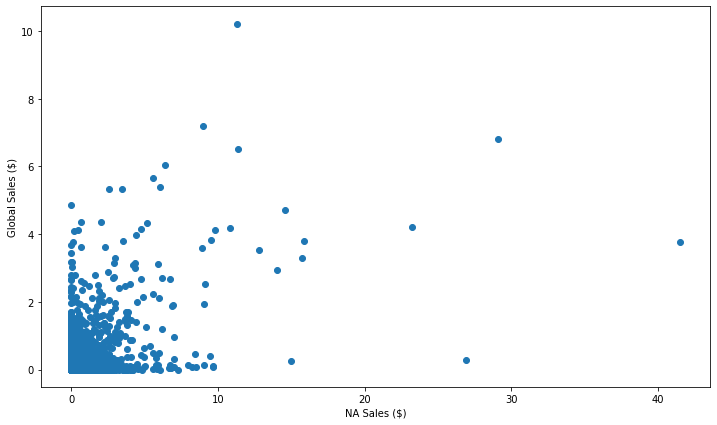

In [ ]:
plt.subplots(figsize=(12,7))
plt.scatter(df.NA_Sales, df.JP_Sales)
plt.xlabel('NA Sales ($)')
plt.ylabel('JP Sales ($)')

For KMeans from scratch I need a few functions: 

*   Randomly assign centroids to start things up.
*   Based on those centroids (and an observation’s distance from it), assign each observation to a cluster.
*   Calculate the mean coordinates of each cluster; these are our new centroids.
*   Reassign clusters based on new centroids.
*   Keep repeating steps 3 and 4 until convergence.


In [ ]:
def calc_distance(X1, X2):
    return (sum((X1 - X2)**2))**0.5

# Assign cluster clusters based on closest centroid
def assign_clusters(centroids, cluster_array):
    clusters = []
    for i in range(cluster_array.shape[0]):
        distances = []
        for centroid in centroids:
            distances.append(calc_distance(centroid, 
                                           cluster_array[i]))
        cluster = [z for z, val in enumerate(distances) if val==min(distances)]
        clusters.append(cluster[0])
    return clusters

# Calculate new centroids based on each cluster's mean
def calc_centroids(clusters, cluster_array):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

# Calculate variance within each cluster
def calc_centroid_variance(clusters, cluster_array):
    sum_squares = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(cluster_mean, 
                                       current_cluster.shape[0],1)
        sum_squares.append(np.sum(np.sum((current_cluster - mean_repmat)**2)))
    return sum_squares

I can take the NA and JP Sales and run the clustering algorithms on them.

In [ ]:
df_cluster = df[["NA_Sales", "JP_Sales"]]
df_array = np.array(df_cluster)

In [ ]:
k = 4
cluster_vars = []
centroids = [df_array[i+2] for i in range(k)]
clusters = assign_clusters(centroids, df_array)
initial_clusters = clusters
print(0, round(np.mean(calc_centroid_variance(clusters, df_array))))
for i in range(20):
    centroids = calc_centroids(clusters, df_array)
    clusters = assign_clusters(centroids, df_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, df_array))
    cluster_vars.append(cluster_var)
    print(i+1, round(cluster_var))

0 1457
1 1048
2 975
3 925
4 876
5 843
6 817
7 792
8 782
9 776
10 772
11 770
12 769
13 768
14 768
15 768
16 767
17 767
18 767
19 767
20 767


For each iteration in my loop, I stored the average of the clusters’ sums of squared deviations from their centroids in the list cluster_vars. As the amount of iterations increase, the average variance drops, and I want to wait until they converge.

Text(0, 0.5, 'Squared Deviations')

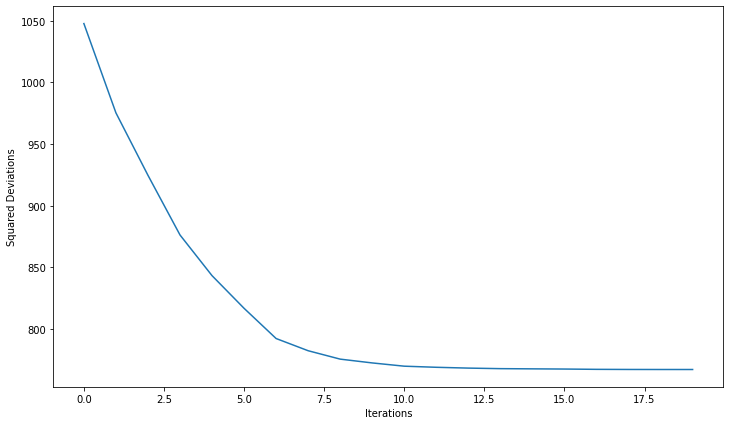

In [ ]:
plt.subplots(figsize=(12,7))
plt.plot(cluster_vars)
plt.xlabel('Iterations')
plt.ylabel('Squared Deviations')

Here is the preclustering result, and as one can see, the clusters are pretty imbalanced.

Text(0, 0.5, 'JP Sales ($)')

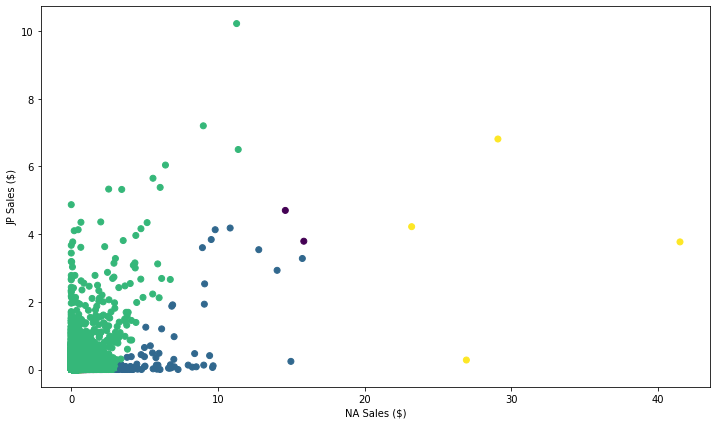

In [ ]:
plt.subplots(figsize=(12,7))
plt.scatter(x=df_array[:,0], y=df_array[:,1], c=initial_clusters, cmap=plt.cm.viridis)
plt.xlabel('NA Sales ($)')
plt.ylabel('JP Sales ($)')

Here is the result of the KMeans Clustering, overall, the clustering was pretty good for the most part.

Text(0, 0.5, 'JP Sales ($)')

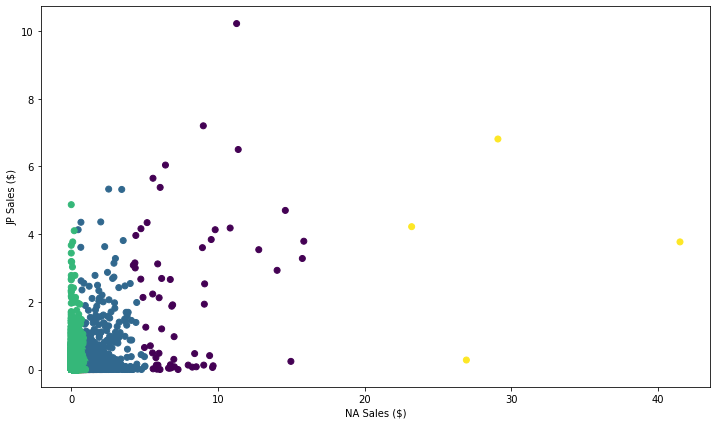

In [ ]:
plt.subplots(figsize=(12,7))
plt.scatter(x= df_array[:,0], y= df_array[:,1], c= clusters, cmap= plt.cm.viridis)
plt.xlabel('NA Sales ($)')
plt.ylabel('JP Sales ($)')

# **Hierarchal Clustering**

I first normalize the data for the sales of the game.

In [ ]:
from sklearn.preprocessing import normalize
df_hi = df[["Rank", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]
data_scaled = normalize(df_hi)
data_scaled = pd.DataFrame(data_scaled, columns=df_hi.columns)
data_scaled.head(10)

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0.010262,0.425762,0.297797,0.038687,0.086815,0.849061
1,0.039772,0.578291,0.071193,0.135425,0.015312,0.800222
2,0.072033,0.380576,0.309263,0.091002,0.079477,0.860077
3,0.103494,0.407506,0.284866,0.084865,0.076585,0.853822
4,0.137591,0.310130,0.244636,0.281235,0.027518,0.863244
5,0.154244,0.596411,0.058099,0.108485,0.014910,0.777905
6,0.200825,0.326484,0.264802,0.186480,0.083199,0.860965
7,0.230523,0.404279,0.265101,0.084429,0.082124,0.836221
8,0.260895,0.422941,0.204658,0.136245,0.065514,0.829648
9,0.247888,0.667563,0.015617,0.006941,0.011651,0.701772


Running the Hierarchal model, I can use the dendrogram to see the number of clusters. It only split into two clusters.

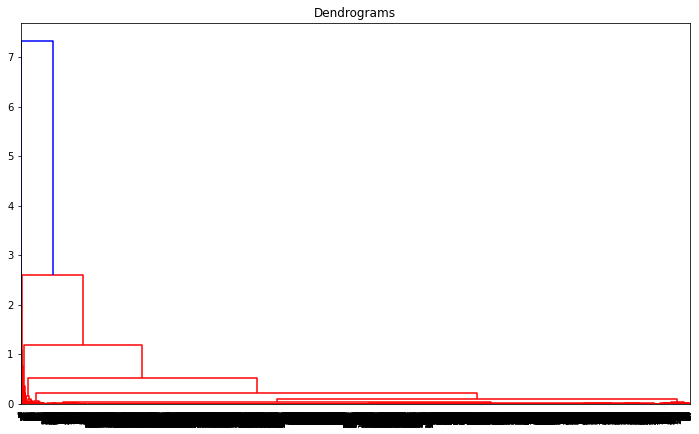

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(12, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, ..., 0, 0, 0])

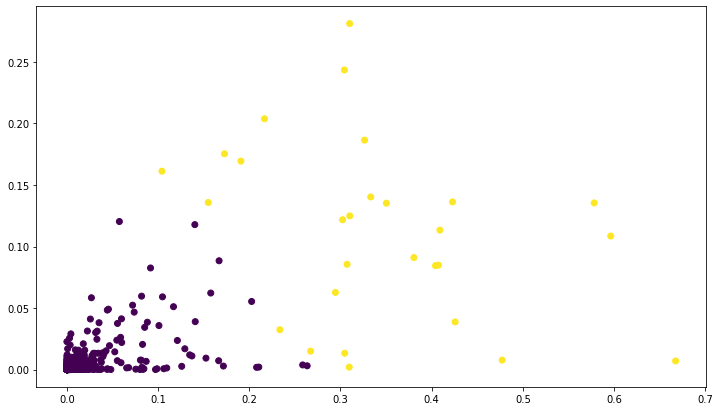

In [ ]:
plt.figure(figsize=(12, 7))  
plt.scatter(data_scaled['NA_Sales'], data_scaled['JP_Sales'], c=cluster.labels_) 

Hierarchal clustering did not turn out very well for the video game sales dataset.

# **Gaussian Mixture Model Clustering**

The GaussianMixture object implements the expectation-maximization (EM) algorithm for fitting mixture-of-Gaussian models. It can also draw confidence ellipsoids for multivariate models, and compute the Bayesian Information Criterion to assess the number of clusters in the data

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(data_scaled)

GaussianMixture(n_components=4)

In [ ]:
labels = gmm.predict(data_scaled)
frame = pd.DataFrame(data_scaled)
frame['cluster'] = labels
frame.columns = ["Rank", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales", "cluster"]

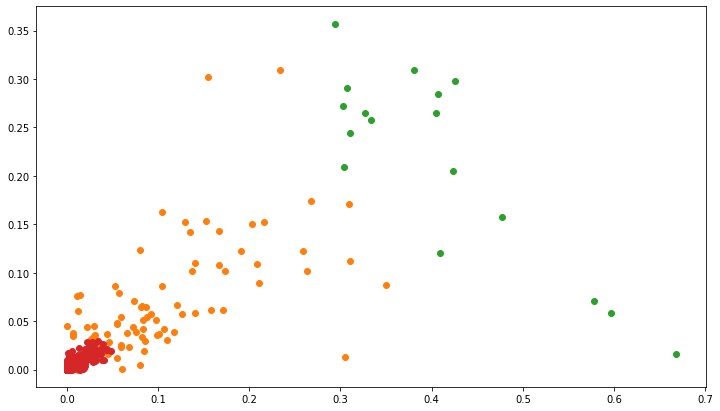

In [ ]:
plt.figure(figsize=(12, 7)) 
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["NA_Sales"],data["EU_Sales"],cmap= plt.cm.viridis)
plt.show()

The Gaussian Mixture Model showed the clusters, although in the lower left dense area the clusters were not well defined.

# **DBScan Clustering**

In [ ]:
from sklearn.cluster import DBSCAN

db_scan = data_scaled.values
db = DBSCAN(eps=0.4, min_samples=20)
db.fit(db_scan)

DBSCAN(eps=0.4, min_samples=20)

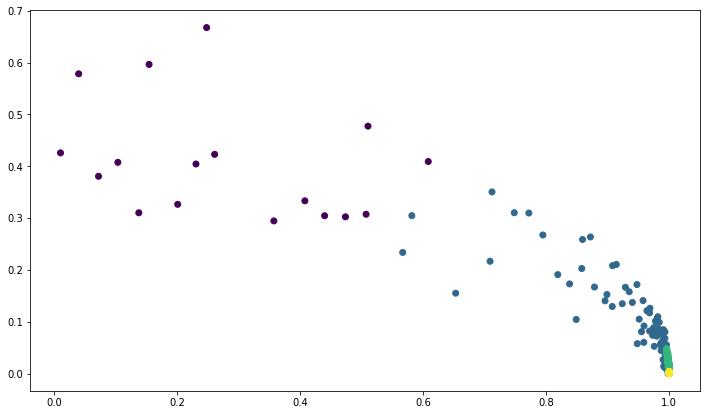

In [ ]:
pred = db.fit_predict(db_scan)
plt.figure(figsize=(12, 7)) 
plt.scatter(db_scan[:,0], db_scan[:,1],c= pred, cmap= plt.cm.viridis)

DBScan showed the clusters, although towards the end the clusters were not very clear.

# **References**



1. https://towardsdatascience.com/k-means-clustering-from-scratch-6a9d19cafc25
2. https://www.analyticsvidhya.com/blog/2019/05beginners-guide-hierarchical-clustering/
